In [13]:
import numpy as np
import pandas as pd




In [17]:
data = pd.read_csv("/home/udbhav/ml/student/student-mat.csv",sep=";")

In [22]:
data = data[["G1","G2","G3","studytime","failures","absences"]]
predict = "G3"
data.head()


,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


In [23]:
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle

In [25]:
#Create the data set x is the input and y is the data to be predicted
x  = np.array(data.drop([predict],1))
y = np.array(data[predict])

In [31]:
#to create the model you need training data set and test dataset to verify the trained model
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

In [32]:
#the ollowing code is used to create a model based on linear regression algorithm
linear = linear_model.LinearRegression()

In [33]:
#the following code trains the model
linear.fit(x_train,y_train)

LinearRegression()

In [34]:
#score is how you verify the model for accuracy [-1 - 0 - 1]
acc =  linear.score(x_test,y_test)

In [35]:
acc

0.9090500599408959

In [36]:

print("CO \n",linear.coef_)

CO 
 [ 0.15276351  0.9845318  -0.22029221 -0.35957273  0.04626459]


In [37]:
print("intercept \n",linear.intercept_)

intercept 
 -1.5513001228890957


In [38]:
#to use the model to predict fresh or real world data use predict() and pass the required data
pr = linear.predict(x_test)

In [39]:
print(pr)

[ 4.51079809 10.49760732 14.24307123 14.91478165  4.95671135 13.09554254
  5.07375424  5.1217874  15.77842275  9.1607764  -1.07530344  8.3965368
 12.88647799 20.14690098  8.21859662 -0.85501124  9.69388998  9.26059992
 19.45050066 11.86638079  9.29583378  3.72916294  8.33630246  7.5088895
 13.53612695 11.81571709 19.36120036  6.67840302 13.93024986  8.71470777
 11.54137918  8.27606812 12.89651444  7.9343337  11.89365757 12.32443062
 11.79818937 13.96983903 12.25709885 12.64019103]


In [42]:
for i in range(len(pr)):
    print(pr[i]," ",x_test[i]," ",y_test[i])

4.51079808727598   [8 6 2 2 2]   5
10.497607317010244   [13 10  2  1 22]   11
14.243071233400245   [14 14  1  0  2]   13
14.914781653832154   [14 15  2  0  0]   15
4.956711351481633   [5 6 2 0 6]   6
13.09554254325532   [14 13  3  0  8]   14
5.073754240223422   [ 6  6  2  1 13]   8
5.121787398947513   [7 7 2 3 5]   7
15.778422749575377   [17 15  1  0  4]   16
9.160776396167678   [10 10  3  0  0]   9
-1.075303444032709   [6 0 2 0 0]   0
8.39653680278386   [10  9  2  0  0]   9
12.886477987582944   [14 12  2  0 20]   13
20.146900977666736   [18 19  1  0 10]   19
8.218596622109587   [ 9  9  2  2 15]   9
-0.8550112388271004   [6 0 1 0 0]   0
9.693889979530804   [10 10  1  0  2]   10
9.260599917521233   [ 8 10  2  0  4]   9
19.450500658272837   [18 18  1  1 24]   18
11.86638078848037   [10  9  2  0 75]   9
9.295833776823029   [ 8 10  1  0  0]   11
3.729162943331823   [ 6  5  1  3 16]   5
8.336302460857834   [9 9 2 0 2]   10
7.508889497272074   [ 7  8  2  0 12]   8
13.536126953666537   [14 13

In [46]:
import pickle
#saving the trained model using pickle.dump
with open("studentmodel.pickle","wb") as f:
    pickle.dump(linear, f)
#using pickled model
#pickled_model = open("studentmodel.pickle" , "rb")
#model = pickle.load(pickled_model)

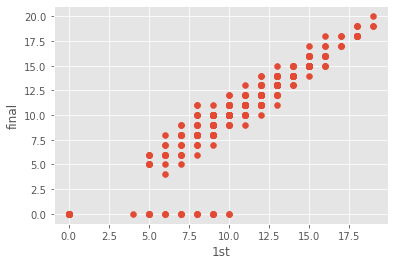

In [57]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
plt.scatter(data["G2"],data["G3"])
plt.xlabel("1st")
plt.ylabel("final")
plt.show()